# Analysis data bandwidth

### Init

Single frame NetVLAD data is 16.00 KB
Single frame SuperPoint data is 0.25 MB
Total NetVLAD data is 17.67 MB
Total SuperPoint data is 1190.28 MB


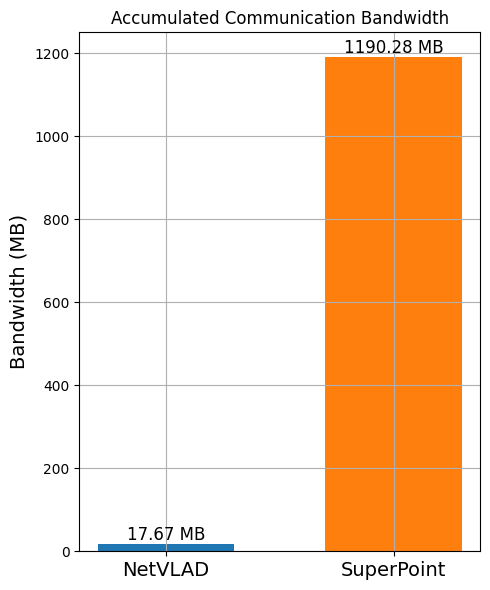

In [2]:
import os
import numpy as np 
from matplotlib import pyplot as plt

NetVLAD_META = {'dimension': 4096, 
                'number': 1, 
                'shape': (1, 4096),
                'dtype': np.float32} # approx, 16KB/frame
SUPERPOINT_META = {'dimension': 256+3,
                    'number': 4096,
                    'shape': (4096, 259),
                    'dtype': np.float32} # approx, 4.05MB/frame

frame_number = 1131

singframe_netvlad_kbs = NetVLAD_META['dimension'] * NetVLAD_META['number'] * 4 / 1024
singleframe_superpoint_mbs = SUPERPOINT_META['dimension'] * SUPERPOINT_META['number'] * 4 / 1024 / 1024
# singleframe_data = singframe_netvlad_mbs + singleframe_superpoint_mbs
print('Single frame NetVLAD data is {:.2f} KB'.format(singframe_netvlad_kbs)) # 20.00 KB
print('Single frame SuperPoint data is {:.2f} MB'.format(singleframe_superpoint_mbs))

netvlad_in_mbs = frame_number * NetVLAD_META['dimension'] * 4 / 1024 / 1024
# superpoint_in_mbs = frame_number * SUPERPOINT_META['number'] * SUPERPOINT_META['dimension'] * 4 / 1024 / 1024
superpoint_in_mbs = 2418794 * SUPERPOINT_META['dimension'] * 4 / 1024 / 1024
# netvlad_in_mbs = netvlad_in_mbs / 1024
# superpoint_in_mbs = superpoint_in_mbs / 1024

# plot them in a bar chart
fig, ax = plt.subplots(figsize=(5, 6))

bar_width = 0.6
index = np.arange(2)
opacity = 1.0
fontsize = 14

netvlad_bar = ax.bar(0+bar_width/2, netvlad_in_mbs, bar_width, alpha=opacity, label='NetVLAD')
superpoint_bar = ax.bar(1 + bar_width/2, superpoint_in_mbs, bar_width, alpha=opacity, label='SuperPoint')


# ax.set_xlabel('Feature')
ax.set_ylabel('Bandwidth (MB)', fontsize=fontsize)
ax.set_title('Accumulated Communication Bandwidth')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('NetVLAD', 'SuperPoint'), fontdict={'size': fontsize})
# ax.legend(fontsize=fontsize)
ax.grid(True)

# annotate the bar
for bar in [netvlad_bar, superpoint_bar]:
    for rect in bar:
        height = rect.get_height()
        data_gb = height
        ax.text(rect.get_x() + rect.get_width()/2, 
                height, 
                '{:.2f} MB'.format(data_gb), 
                ha='center', 
                va='bottom',
                fontdict={'size': 12})
print('Total NetVLAD data is {:.2f} MB'.format(netvlad_in_mbs))
print('Total SuperPoint data is {:.2f} MB'.format(superpoint_in_mbs))

fig.tight_layout()
plt.savefig('/data2/sfm/single_session/vins_hard_loop/feature_bandwidth.png')
plt.show()

